# Spaceship Titanic Predictions

### Life cycle of Machine learning Project

- Understanding the Problem Statement
- Data Collection
- Exploratory data analysis
- Data Cleaning
- Data Pre-Processing
- Model Training
- Choose best model

---

## About

The **Spaceship Titanic** is a fictional interstellar voyage where an anomaly in spacetime has caused passengers to be mysteriously transported to an alternate dimension.

You are provided with personal records of the passengers, and the goal is to **predict whether each passenger was transported** based on these attributes. The data was partially recovered from the ship's damaged computer system.

This project simulates a **real-world classification problem** and is ideal for building an **end-to-end MLOps pipeline** from data ingestion to deployment.

---

## 1) Problem Statement

After the Spaceship Titanic’s collision with the anomaly, the transport records were corrupted. You are tasked with creating a machine learning model to predict whether a passenger was **Transported** to an alternate dimension.

This model can help the ship's investigation committee understand what factors contributed to the disappearance and automate future anomaly responses.

- **Objective**: Predict the `Transported` (True/False) status using passenger data.
- **Type**: Binary Classification Problem

---

## 2) Data Collection

The dataset is provided in three CSV files:

- `train.csv` – Contains training data 
- `test.csv` – Used for final predictions 
- `sample_submission.csv` – Sample submission format for Kaggle

Each row represents a unique passenger with features such as:

- Personal information: `HomePlanet`, `CryoSleep`, `Cabin`, `Destination`, `Age`, `VIP`, `Name`
- Spending features: `RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck`
- Target column: `Transported` (only in train data)

---

### 2.1 Import Data and Required Packages

#### Importing Pandas, Numpy, Matplotlib, Seaborn, math

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

#### Import the CSV Data as Pandas DataFrame

In [238]:
train_df = pd.read_csv('train.csv')
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [239]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Shape of dataset

In [240]:
train_df.shape

(8693, 14)

In [241]:

test_df.shape

(4277, 13)

#### Summary of dataset

In [242]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [243]:
test_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


#### Check Datatypes in the dataset

In [244]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [245]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


## 3. EXPLORING DATA

In [246]:
# define numerical & categorical columns

train_df['Transported'] = train_df['Transported'].astype('str')
train_numeric_features = [feature for feature in train_df.columns if train_df[feature].dtype != 'O']
train_categorical_features = [feature for feature in train_df.columns if train_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(train_numeric_features), train_numeric_features))
print('\nWe have {} categorical features : {}'.format(len(train_categorical_features), train_categorical_features))

We have 6 numerical features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

We have 8 categorical features : ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']


In [247]:
# define numerical & categorical columns
test_numeric_features = [feature for feature in test_df.columns if test_df[feature].dtype != 'O']
test_categorical_features = [feature for feature in test_df.columns if test_df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(test_numeric_features), test_numeric_features))
print('\nWe have {} categorical features : {}'.format(len(test_categorical_features), test_categorical_features))

We have 6 numerical features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

We have 7 categorical features : ['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']


In [248]:
# proportion of count data on categorical columns
for col in train_categorical_features:
    print(train_df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

PassengerId
0001_01    0.011504
6136_01    0.011504
6141_01    0.011504
6139_06    0.011504
6139_05    0.011504
             ...   
3126_01    0.011504
3124_03    0.011504
3124_02    0.011504
3124_01    0.011504
9280_02    0.011504
Name: proportion, Length: 8693, dtype: float64
---------------------------
HomePlanet
Earth     54.192181
Europa    25.094206
Mars      20.713613
Name: proportion, dtype: float64
---------------------------
CryoSleep
False    64.16942
True     35.83058
Name: proportion, dtype: float64
---------------------------
Cabin
G/734/S     0.094184
G/109/P     0.082411
B/201/P     0.082411
G/1368/P    0.082411
G/981/S     0.082411
              ...   
G/556/P     0.011773
E/231/S     0.011773
G/545/S     0.011773
G/543/S     0.011773
F/947/P     0.011773
Name: proportion, Length: 6560, dtype: float64
---------------------------
Destination
TRAPPIST-1e      69.498296
55 Cancri e      21.149101
PSO J318.5-22     9.352603
Name: proportion, dtype: float64
----------------

In [249]:
# proportion of count data on categorical columns
for col in test_categorical_features:
    print(test_df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

PassengerId
0013_01    0.023381
6288_02    0.023381
6269_01    0.023381
6269_02    0.023381
6269_03    0.023381
             ...   
3072_01    0.023381
3074_01    0.023381
3075_01    0.023381
3077_01    0.023381
9277_01    0.023381
Name: proportion, Length: 4277, dtype: float64
---------------------------
HomePlanet
Earth     54.009547
Europa    23.914081
Mars      22.076372
Name: proportion, dtype: float64
---------------------------
CryoSleep
False    63.097514
True     36.902486
Name: proportion, dtype: float64
---------------------------
Cabin
G/160/P     0.191525
D/273/S     0.167584
B/31/P      0.167584
G/748/S     0.167584
E/228/S     0.167584
              ...   
E/236/S     0.023941
F/650/S     0.023941
G/566/P     0.023941
G/557/S     0.023941
G/1498/S    0.023941
Name: proportion, Length: 3265, dtype: float64
---------------------------
Destination
TRAPPIST-1e      70.633214
55 Cancri e      20.095579
PSO J318.5-22     9.271207
Name: proportion, dtype: float64
--------------

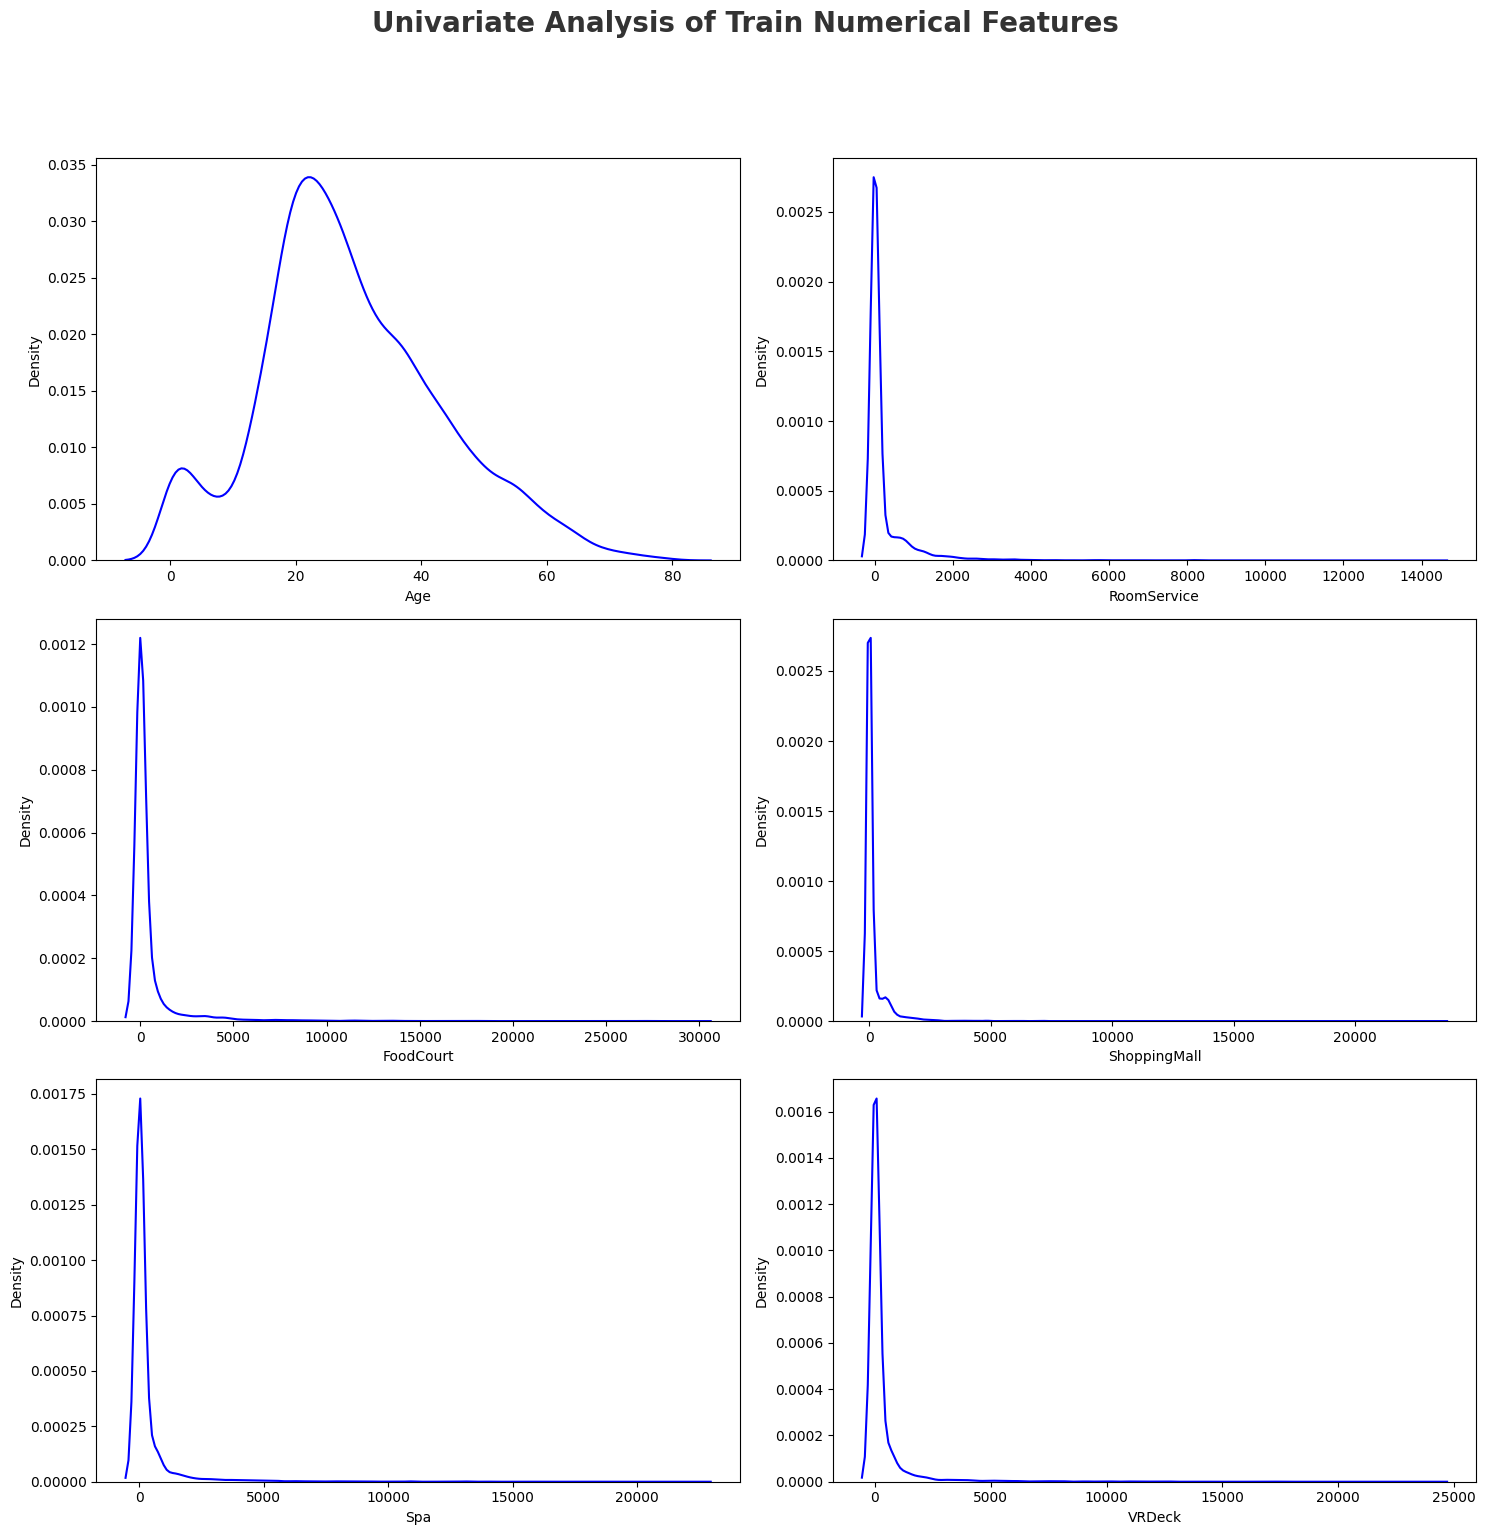

In [250]:
rows = math.ceil(len(train_numeric_features) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Univariate Analysis of Train Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, feature in enumerate(train_numeric_features):
    sns.kdeplot(x=train_df[feature], ax=axes[i], color='blue')
    axes[i].set_xlabel(feature)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


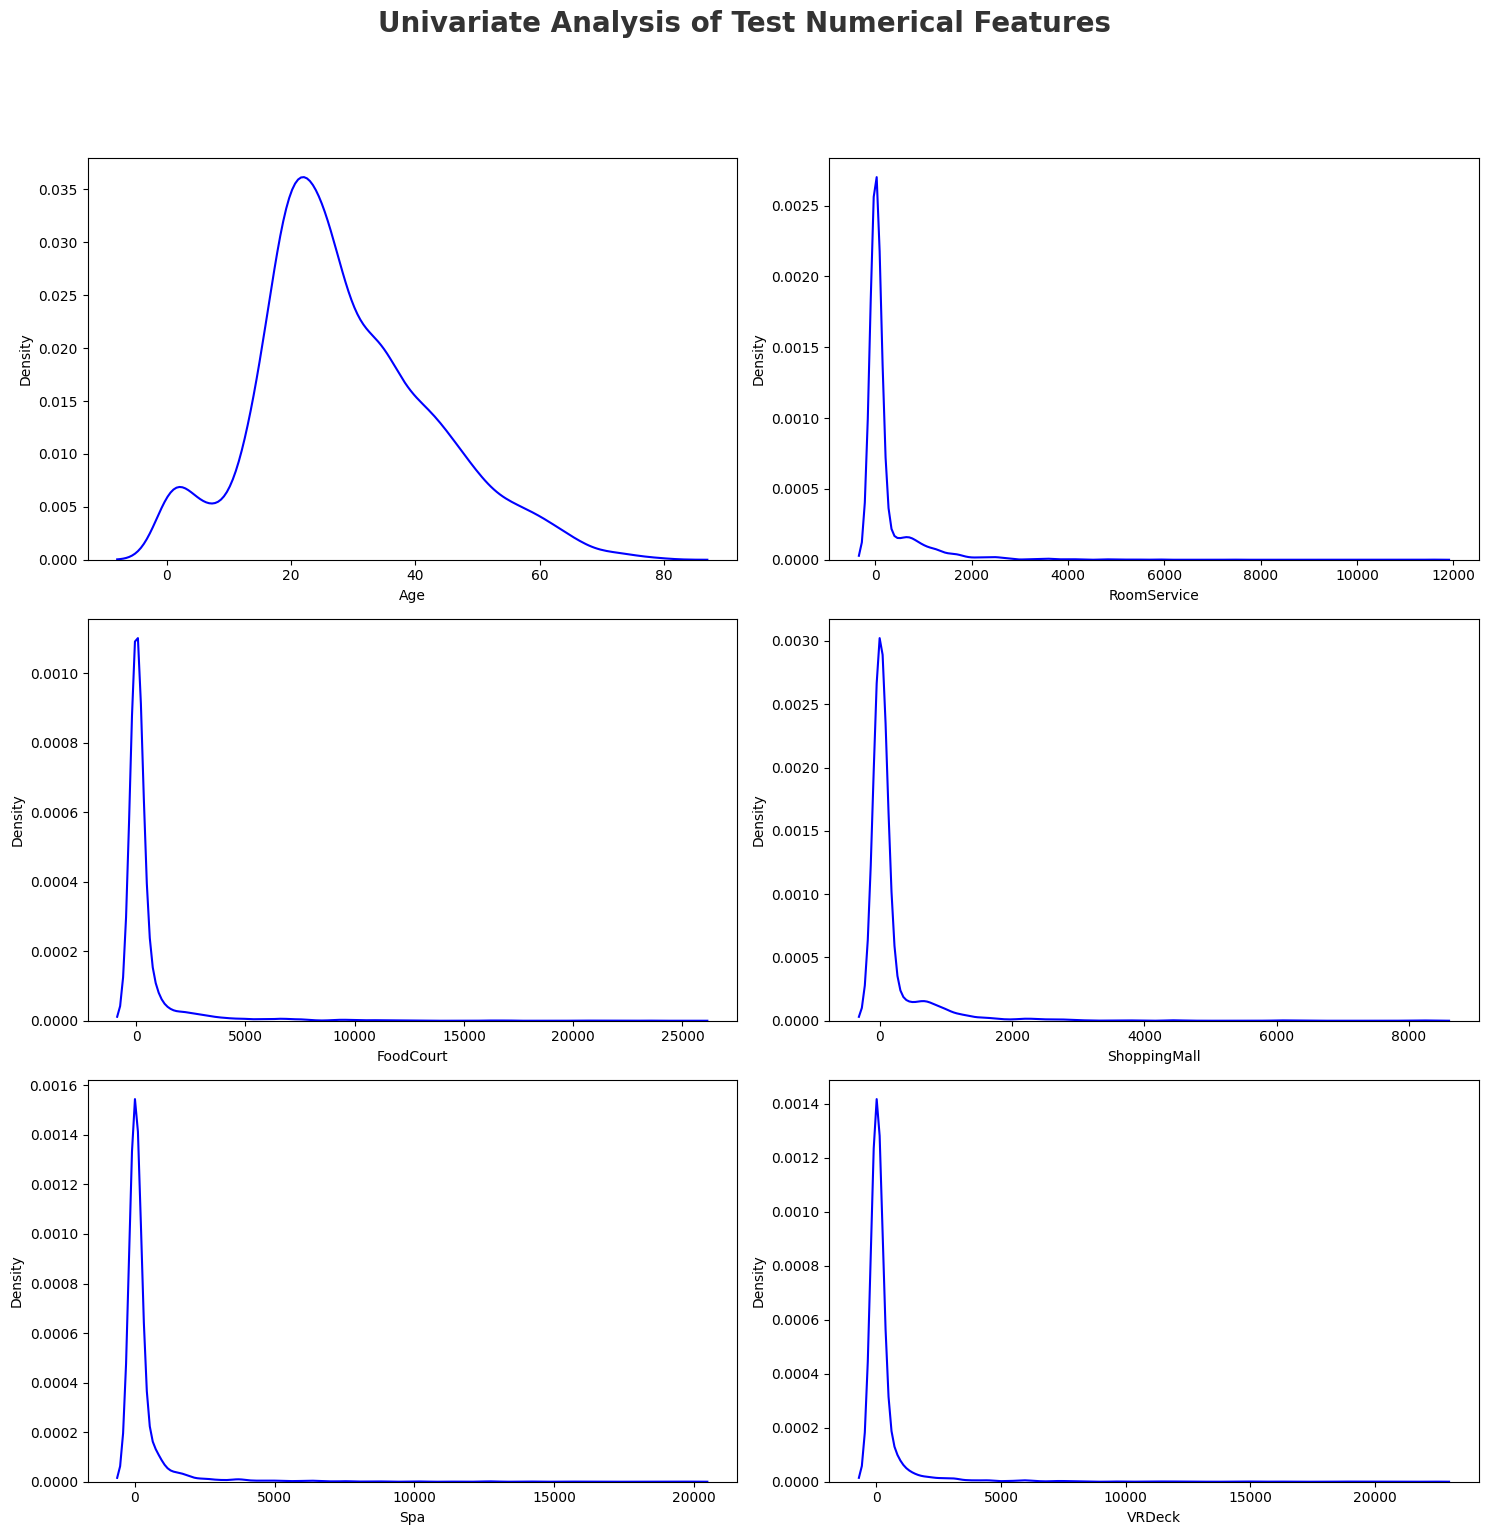

In [251]:
rows = math.ceil(len(test_numeric_features) / 2)
fig, axes = plt.subplots(rows, 2, figsize=(15, 5 * rows))
fig.suptitle('Univariate Analysis of Test Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.02)

# Flatten axes for easy indexing
axes = axes.flatten()

for i, feature in enumerate(test_numeric_features):
    sns.kdeplot(x=test_df[feature], ax=axes[i], color='blue')
    axes[i].set_xlabel(feature)

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### 📈 Insight: Skewness in Numerical Feature Distributions

From the univariate analysis of numerical features, we observe distinct distribution patterns:

- **`Age`** shows a near-normal distribution, peaking around the early 20s, suggesting a concentration of younger passengers. This implies that the majority of travelers were young adults.
- **`RoomService`**, **`FoodCourt`**, **`ShoppingMall`**, **`Spa`**, and **`VRDeck`** all demonstrate **strong right skewness**:
  - Most passengers spent **little to no money** on these services.
  - A **small minority spent excessively**, stretching the distribution tails.

📌 **Implications**:
- These right-skewed features may benefit from **log transformation** during preprocessing to reduce skewness and stabilize variance.
- This distribution may indicate economic disparities or differing service preferences among passengers.



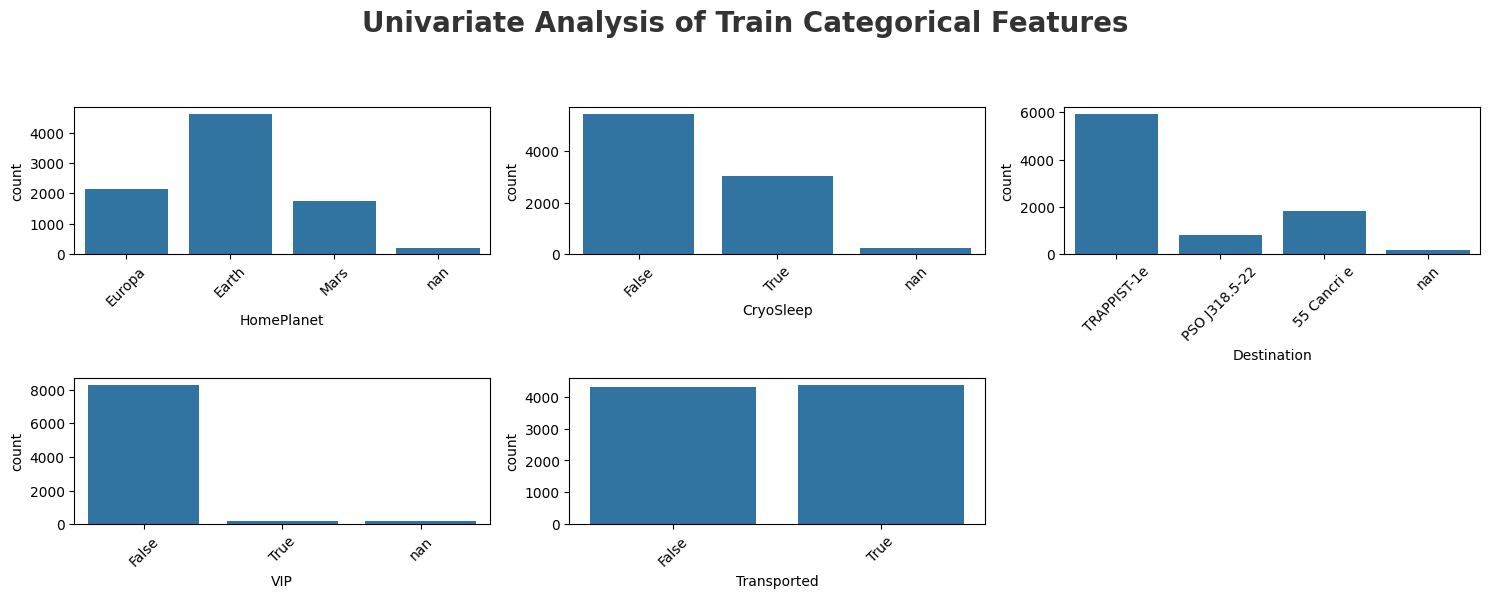

In [258]:
# Safely remove columns from list
train_categorical_features = [col for col in train_categorical_features if col not in ['Cabin', 'Name','PassengerId']]

# Convert to string to avoid dtype errors in seaborn (optional but recommended)
train_df[train_categorical_features] = train_df[train_categorical_features].astype(str)

# Create the plot
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Train Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(train_categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=train_df[train_categorical_features[i]])
    plt.xlabel(train_categorical_features[i])
    plt.xticks(rotation=45)

# Tight layout should be outside the loop
plt.tight_layout(rect=[0, 0, 1, 0.95])


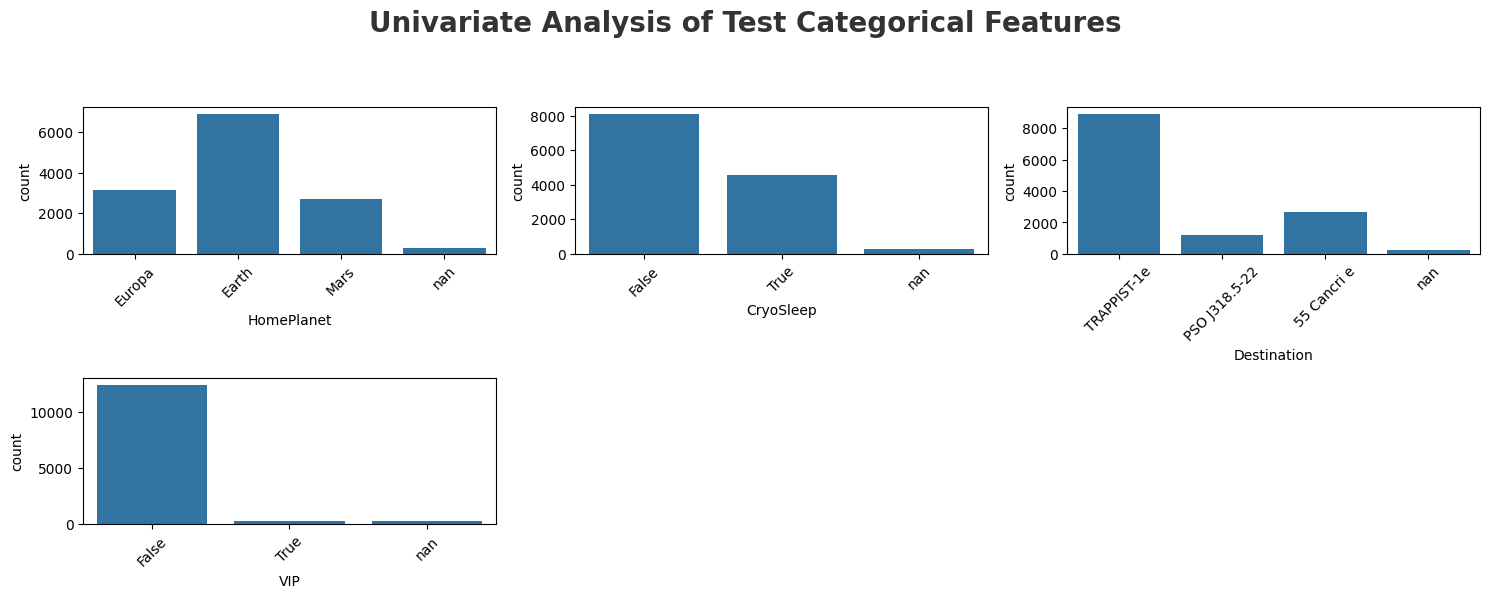

In [253]:
# Safely remove columns from list
test_categorical_features = [col for col in test_categorical_features if col not in ['Cabin', 'Name','PassengerId']]

# Convert to string to avoid dtype errors in seaborn (optional but recommended)
test_df[test_categorical_features] = test_df[test_categorical_features].astype(str)

# Create the plot
plt.figure(figsize=(15, 8))
plt.suptitle('Univariate Analysis of Test Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(len(test_categorical_features)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x=df[test_categorical_features[i]])
    plt.xlabel(test_categorical_features[i])
    plt.xticks(rotation=45)

# Tight layout should be outside the loop
plt.tight_layout(rect=[0, 0, 1, 0.95])


### 🧩 Insight: Distribution of Categorical Features

The univariate analysis of categorical features reveals several notable patterns:

- **`HomePlanet`**:
  - Most passengers originated from **Earth**, followed by **Europa** and **Mars**.
  - This may reflect Earth being the primary hub or launch point for interstellar travel.

- **`CryoSleep`**:
  - A majority of passengers **were not in cryosleep** 

- **`Destination`**:
  - **TRAPPIST-1e** was the most common destination by far, indicating it may have been the main or default route.
  - **55 Cancri e** and **PSO J318.5-22** were far less frequent.

- **`VIP`**:
  - Very few passengers were marked as **VIP**—the vast majority were regular travelers.
  - This points to a heavily economy or standard-class population.

- **`Transported`**:
  - The **target variable** appears **evenly distributed** between `True` and `False`, showing **no significant class imbalance**. This is favorable for classification model training.

These patterns provide early clues about the demographics, service usage, and class dynamics of passengers—useful for feature engineering and downstream modeling tasks.


In [262]:
train_discrete_features=[feature for feature in train_numeric_features if len(df[feature].unique())<=25]

train_continuous_features=[feature for feature in train_numeric_features if len(df[feature].unique()) > 25]

print('We have {} train_discrete features : {}'.format(len(train_discrete_features), train_discrete_features))
print('\nWe have {} train_continuous_features : {}'.format(len(train_continuous_features), train_continuous_features))

We have 0 train_discrete features : []

We have 6 train_continuous_features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


In [267]:
test_discrete_features=[feature for feature in test_numeric_features if len(df[feature].unique())<=25]

test_continuous_features=[feature for feature in test_numeric_features if len(df[feature].unique()) > 25]

print('We have {} test_discrete features : {}'.format(len(test_discrete_features), test_discrete_features))
print('\nWe have {} test_continuous_features : {}'.format(len(test_continuous_features), test_continuous_features))

We have 0 test_discrete features : []

We have 6 test_continuous_features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


### Check Multicollinearity in Numerical features

In [263]:
train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [264]:
test_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


#### Insights
-  There is no multicollinearity between any variables

### Check Multicollinearity for Categorical features
- A chi-squared test (also chi-square or χ2 test) is a statistical hypothesis test that is valid to perform when the test statistic is chi-squared distributed under the null hypothesis, specifically Pearson's chi-squared test

- A chi-square statistic is one way to show a relationship between two categorical variables.

- Here we test correlation of Categorical columns with Target column i.e Transported

Null Hypothesis (
): The Feature is independent of target column (No-Correlation)

Alternative Hypothesis (
): The Feature and Target column are not independent (Correalted)

In [270]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in categorical_features:
    if chi2_contingency(pd.crosstab(train_df['Transported'], train_df[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[categorical_features, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,HomePlanet,Reject Null Hypothesis
1,CryoSleep,Reject Null Hypothesis
2,Destination,Reject Null Hypothesis
3,VIP,Reject Null Hypothesis


### Checking Null Values

In [271]:

train_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           199
Destination       0
Age             179
VIP               0
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [272]:
test_df.isnull().sum()

PassengerId       0
HomePlanet        0
CryoSleep         0
Cabin           100
Destination       0
Age              91
VIP               0
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

In [274]:
train_continues_features=[feature for feature in train_numeric_features if len(df[feature].unique())>=10]
print('Num of train continues features :',train_continues_features)

Num of train continues features : ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\3766129547.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True,
C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\3766129547.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True,
C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\3766129547.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True,
C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\3766129547.py:14: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True,
C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\37

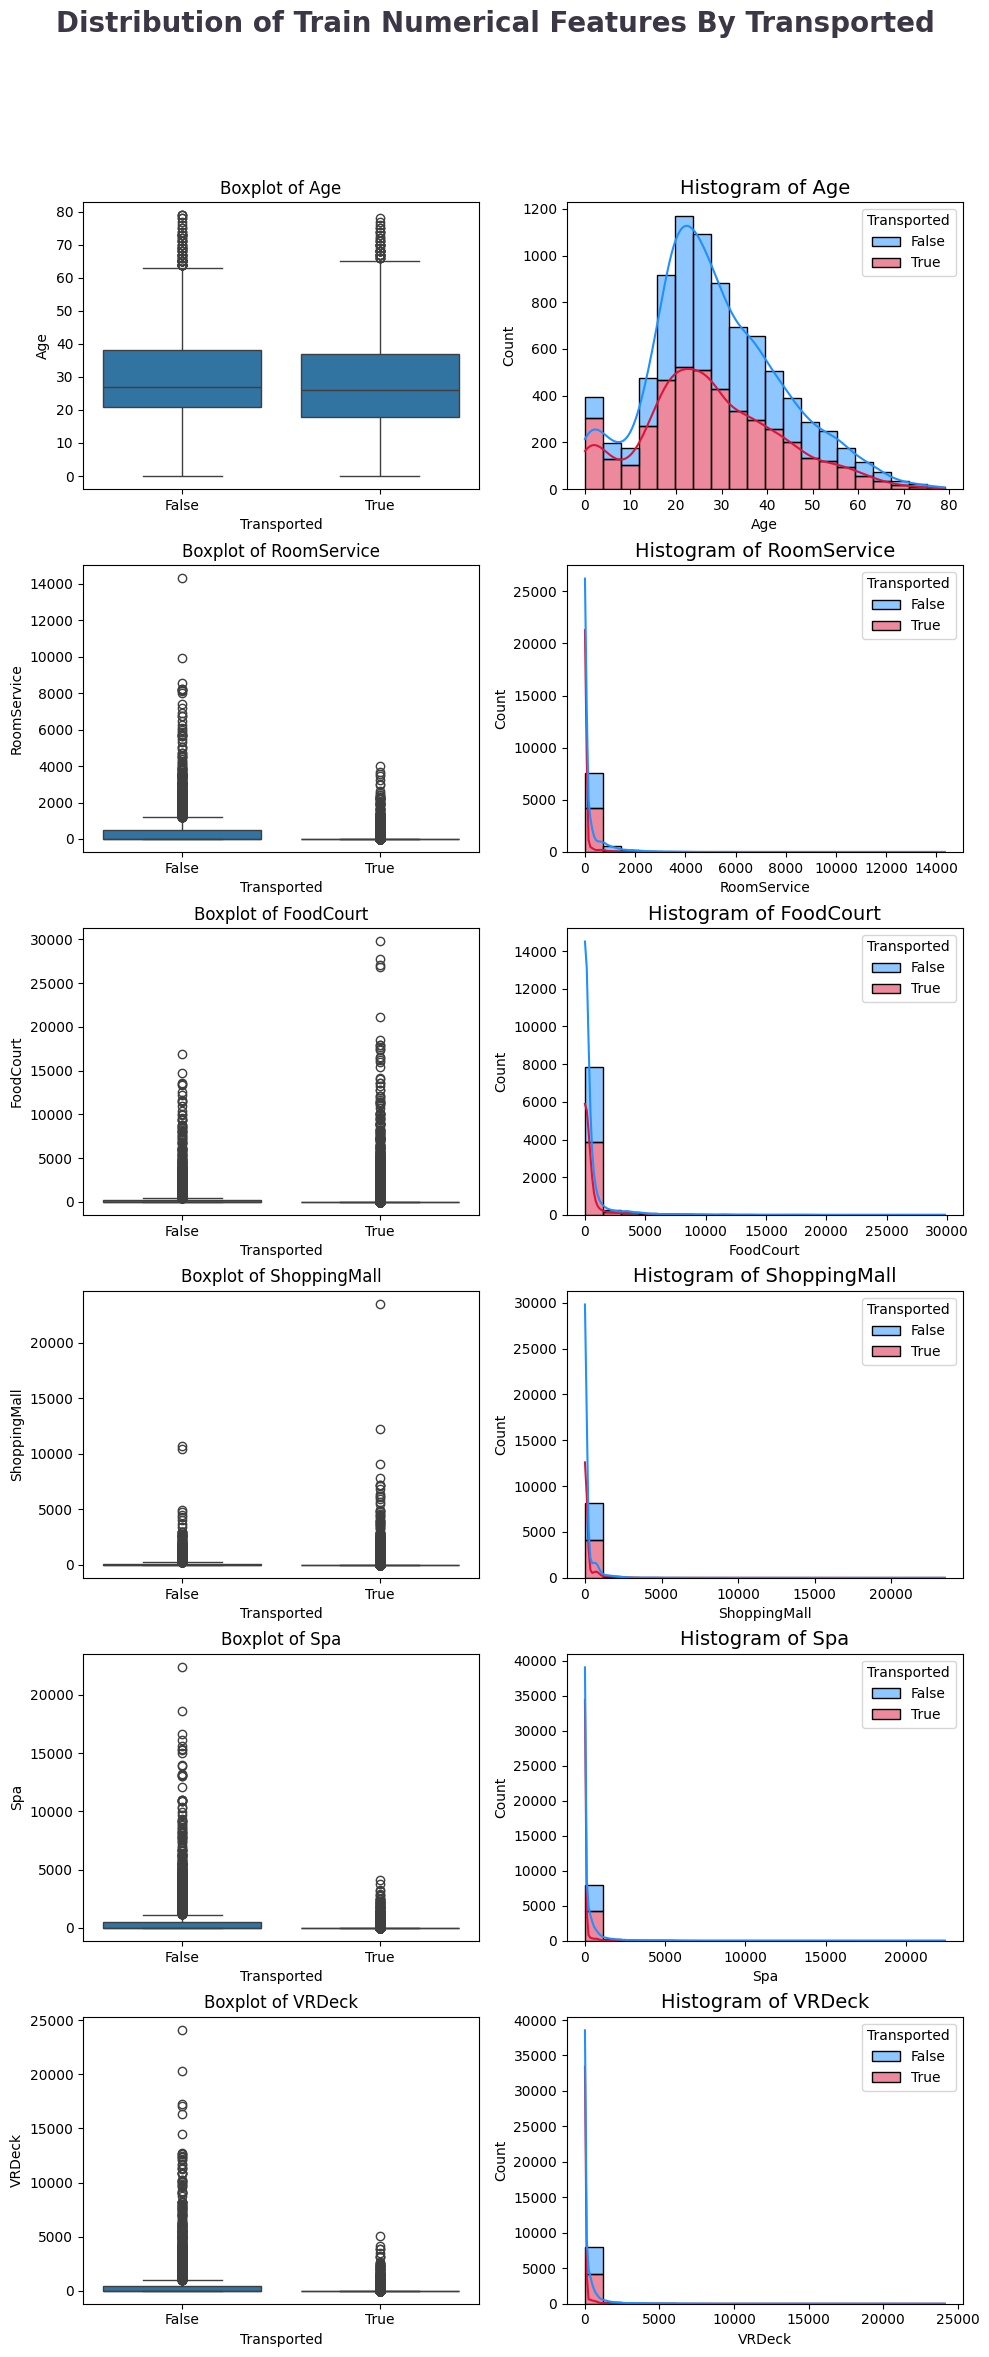

In [277]:
clr1 = ['#1E90FF', '#DC143C', '#228B22']  # Blue, Crimson, ForestGreen  # Add more colors if needed after checking unique values
train_num_features = len(train_continues_features)

fig, ax = plt.subplots(train_num_features, 2, figsize=(10, 4*train_num_features))
fig.suptitle('Distribution of Train Numerical Features By Transported', color='#3C3744',
             fontsize=20, fontweight='bold', ha='center')

for i, col in enumerate(train_continues_features):   
    # Boxplot without palette since no hue
    sns.boxplot(data=train_df, x='Transported', y=col, ax=ax[i,0])
    ax[i,0].set_title(f'Boxplot of {col}', fontsize=12)

    # Histogram with hue and palette
    sns.histplot(data=train_df, x=col, hue='Transported', bins=20, kde=True, 
                 multiple='stack', palette=clr1, ax=ax[i,1])
    ax[i,1].set_title(f'Histogram of {col}', fontsize=14)

fig.tight_layout()
fig.subplots_adjust(top=0.90)


# 🔍 Quick Feature Distribution Report

## Key Takeaways
- **Age**: Transported group skews younger.
- **Expenses (RoomService, FoodCourt, Spa, etc.)**: Highly skewed with many low values and few large outliers.
- **VRDeck & Spa**: Slightly higher usage among transported passengers.

## Observations
- Data is **right-skewed** with **outliers**.
- Behavioral features may influence `Transported`.

## Next Moves
- Try log transforms.
- Run a quick feature importance check.


## 4. Visualization

#### 4.1 Visualize the target feature

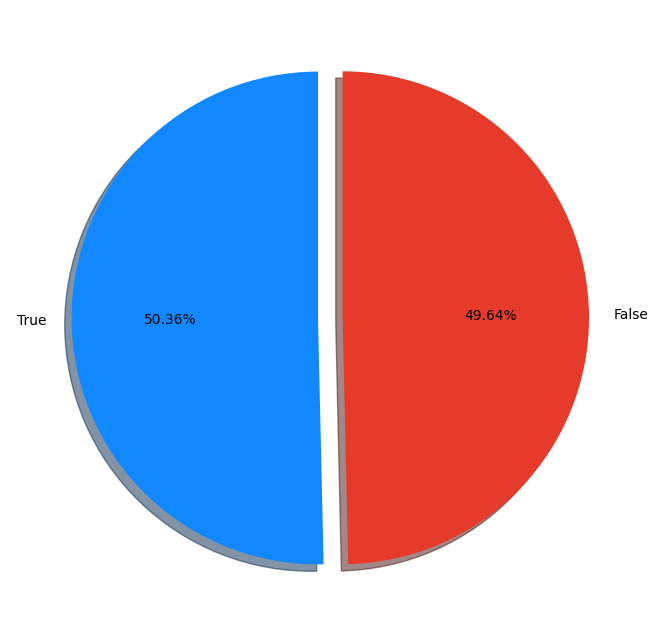

In [278]:
# Get percentage and corresponding labels dynamically
percentage = train_df.Transported.value_counts(normalize=True) * 100
labels = percentage.index.astype(str).tolist()  # Convert index to list of strings

# Adjust explode and colors accordingly
explode = [0.1 if label == "False" else 0 for label in labels]
colors = ['#1188ff', '#e63a2a', '#999999'][:len(labels)]

# Plot PieChart with Matplotlib
fig, ax = plt.subplots(figsize=(15, 8))
ax.pie(percentage, labels=labels, startangle=90,
       autopct='%1.2f%%', explode=explode, shadow=True, colors=colors)
plt.show()

- From the chart it is seen that the Target Variable is balanced

#### 4.2 Does Age has any impact on Transported?

In [316]:
train_df.groupby('Age')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
Age  Transported            
0.0  True          80.898876
     False         19.101124
1.0  True          73.134328
     False         26.865672
2.0  True          70.666667
...                      ...
77.0 False         50.000000
     True          50.000000
78.0 False         66.666667
     True          33.333333
79.0 False        100.000000

[159 rows x 1 columns]

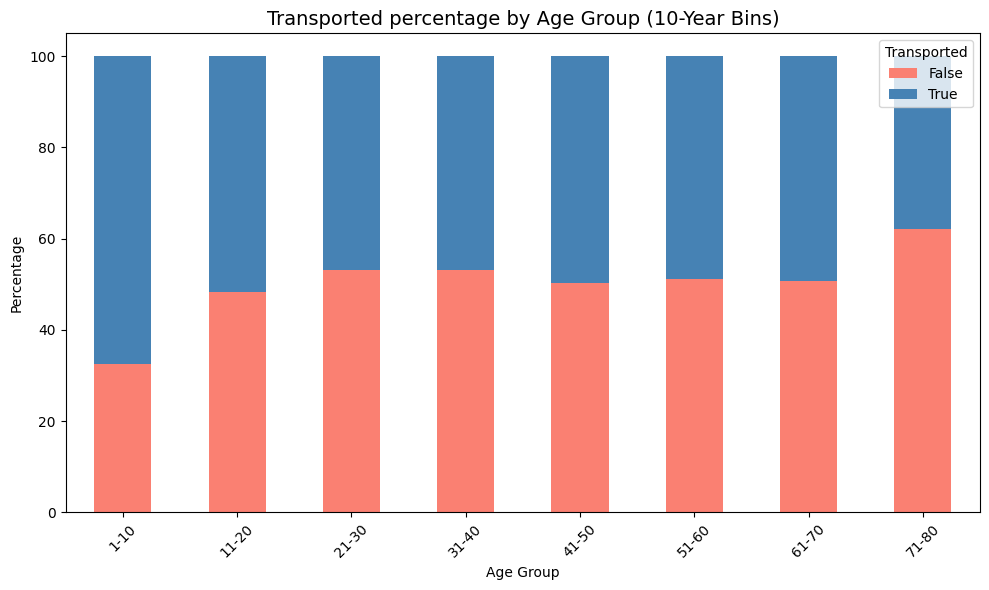

In [322]:
bins = range(1, 82, 10)  # Now starts at 1, ends before 81
labels = [f"{i}-{i+9}" for i in bins[:-1]]
train_df['AgeGroup'] = pd.cut(train_df['Age'], bins=bins, labels=labels, right=False)

# Group by AgeGroup and Transported status
age_grouped = (
    train_df.groupby('AgeGroup')['Transported']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0) * 100
)

# Plot as stacked bar chart
age_grouped.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=['salmon', 'steelblue']
)

plt.title('Transported percentage by Age Group (10-Year Bins)', fontsize=14)
plt.ylabel('Percentage')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.legend(title='Transported')
plt.tight_layout()
plt.show()


**Report:**

Yes, age shows a measurable impact on the likelihood of being **Transported**.

By binning `Age` into 10-year intervals (starting from 1–10), a stacked bar graph reveals:

- 📈 Younger age groups (1-10, 10–20, 21–30) show **higher transported percentages**. 
- 🚫 Older bins (51–60, 61–70) reflect a **lower chance** of being transported.
- 📊 Distribution is **not uniform**, suggesting age plays a role in passenger experience or outcome.



#### 4.3 Does RoomService has any impact on Transported?

In [324]:
train_df.groupby('RoomService')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
RoomService Transported            
0.0         True          63.331540
            False         36.668460
1.0         False         65.811966
            True          34.188034
2.0         False         59.493671
...                             ...
8209.0      False        100.000000
8243.0      False        100.000000
8586.0      False        100.000000
9920.0      False        100.000000
14327.0     False        100.000000

[1560 rows x 1 columns]

C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\291876755.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Transported",y='RoomService', data=train_df, palette="Accent")


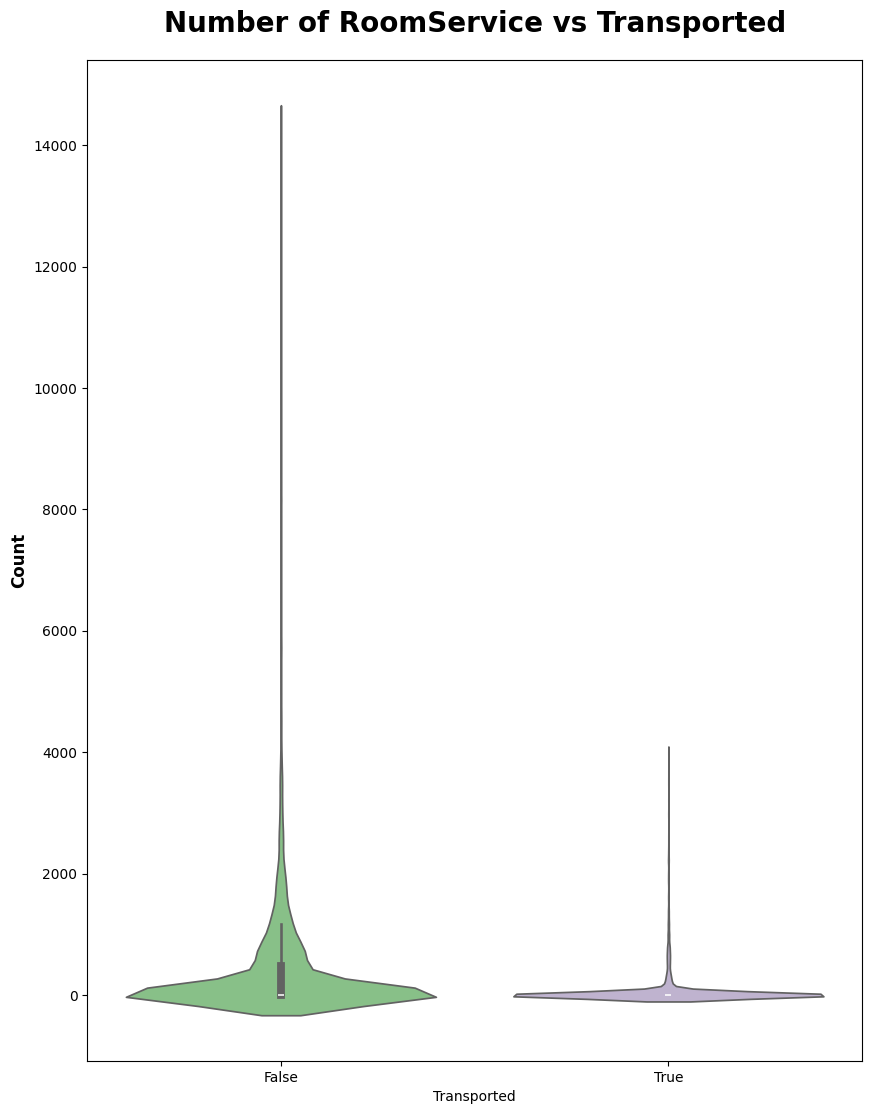

In [326]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="Transported",y='RoomService', data=train_df, palette="Accent")
plt.title("Number of RoomService vs Transported", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.ylim()
plt.show()

**Report:**
- Passengers labeled as **Transported = True** tend to have **lower RoomService counts**.
- The **Transported = False** group shows a **broader and heavier distribution** toward higher RoomService expenditures.
- This suggests a potential **negative correlation** between RoomService activity and being transported.
- There are more outliers in **False Transported** which need to be handeled.

#### 4.4 Does FoodCourt has any impact on Transported?

In [328]:
train_df.groupby('FoodCourt')['Transported'].value_counts(normalize=True).to_frame()*100

proportion
FoodCourt Transported            
0.0       True          59.090909
          False         40.909091
1.0       False         77.586207
          True          22.413793
2.0       False         78.666667
...                           ...
21066.0   True         100.000000
26830.0   True         100.000000
27071.0   True         100.000000
27723.0   True         100.000000
29813.0   True         100.000000

[1796 rows x 1 columns]

C:\Users\marcd\AppData\Local\Temp\ipykernel_14940\3116332146.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Transported",y='FoodCourt', data=train_df, palette="Accent")


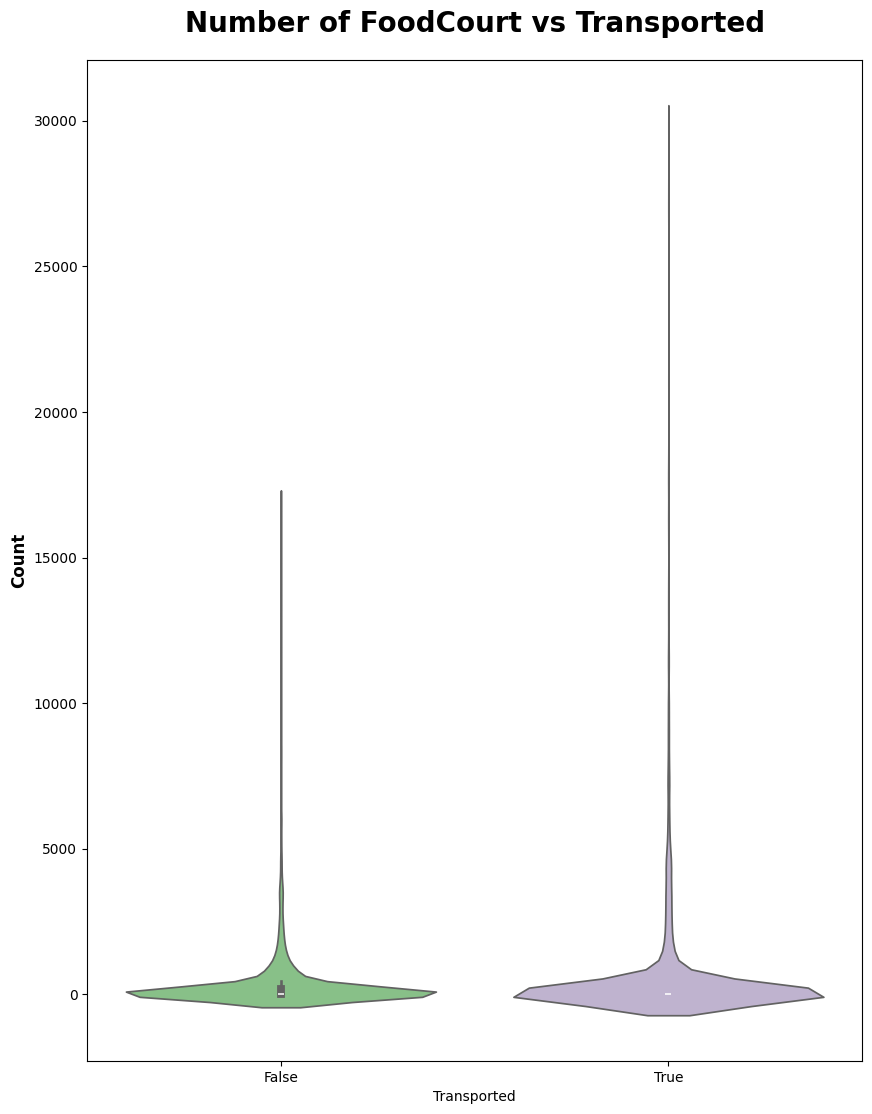

In [329]:
plt.subplots(figsize=(10,13))
sns.violinplot(x="Transported",y='FoodCourt', data=train_df, palette="Accent")
plt.title("Number of FoodCourt vs Transported", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.ylim()
plt.show()

**Report:**
- Passengers with low or no FoodCourt spending are more likely to be transported. Those not transported show a slightly broader spending distribution. This suggests a mild negative correlation.
